In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
fname1   = ["RNN_T05.dat","RNN_T09.dat","RNN_T13.dat","RNN_T17.dat","RNN_T21.dat","RNN_T25.dat",
            "RNN_T29.dat","RNN_T33.dat"]
labels1  = ["T=5","T=9","T=13","T=17","T=21","T=25","T=29","T=33"]

fname2   = ["LSTM_T05_2.dat","LSTM_T09_2.dat","LSTM_T13_2.dat","LSTM_T17_2.dat","LSTM_T21_2.dat","LSTM_T25_2.dat",
          "LSTM_T29_2.dat","LSTM_T33_2.dat"]
labels2  = ["T=5","T=9","T=13","T=17","T=21","T=25","T=29","T=33"]

# fname = ["RNN_T5.dat", "LSTM_T5.dat","RNN_T9.dat", "LSTM_T9.dat","RNN_T13.dat", "LSTM_T13.dat",
#         "RNN_T17.dat", "LSTM_T17.dat","RNN_T21.dat", "LSTM_T21.dat"]
# labels = ["RNN T5","LSTM T5","RNN T9","LSTM T9","RNN T13","LSTM T13","RNN T17","LSTM T17",
#          "RNN T21","LSTM T21"]

results1 = [np.loadtxt(f) for f in fname1]
step1    = [results1[i][:,0] for i in range(len(fname1))]
acc1     = [results1[i][:,1] for i in range(len(fname1))]
loss1    = [results1[i][:,2] for i in range(len(fname1))]

results2 = [np.loadtxt(f) for f in fname2]
step2    = [results2[i][:,0] for i in range(len(fname2))]
acc2     = [results2[i][:,1] for i in range(len(fname2))]
loss2    = [results2[i][:,2] for i in range(len(fname2))]

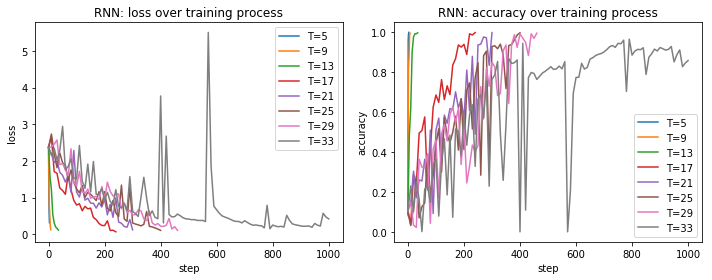

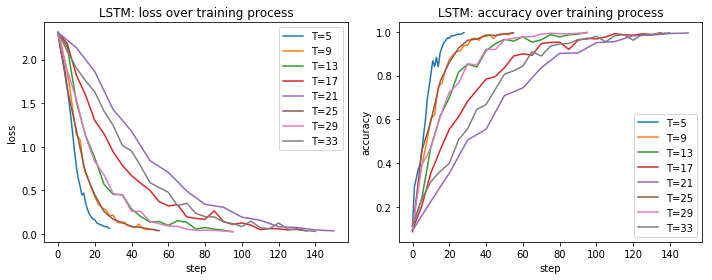

In [11]:
lr = []
for i in range(len(fname)):
    f = open(fname[i], "r")
#     print("\n---- model {} -----".format(i+1))
    for i in range(9):
        info = f.readline()[1:-1]
#         print(info)
        lr.append(float(info[-5:])) if i == 6 else None
    f.close()

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title("RNN: loss over training process")
for i in range(len(fname1)):
    p=plt.plot(step1[i], loss1[i], label = "{}".format(labels1[i]))
#     p=plt.plot(step[i], loss[i], label = "{}, lr={}".format(labels[i],lr[i]))
#     plt.plot(step[i], loss[i],"--",color=p[0].get_color(),label="test ({})".format(labels[i]))
plt.ylabel("loss")
plt.xlabel("step")
# plt.xlim(None,150)
plt.legend()

plt.subplot(122)
plt.title("RNN: accuracy over training process")
for i in range(len(fname1)):
    p=plt.plot(step1[i], acc1[i], label = "{}".format(labels1[i]))
#     p=plt.plot(step[i], acc[i], label = "{}, lr={}".format(labels[i],lr[i]))
#     plt.plot(step[i], acc[i], "--", color=p[0].get_color(),label = "test ({})".format(labels[i]))
plt.ylabel("accuracy")
plt.xlabel("step")
# plt.xlim(None,150)
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title("LSTM: loss over training process")
for i in range(len(fname2)):
    p=plt.plot(step2[i], loss2[i], label = "{}".format(labels2[i]))
#     p=plt.plot(step[i], loss[i], label = "{}, lr={}".format(labels[i],lr[i]))
#     plt.plot(step[i], loss[i],"--",color=p[0].get_color(),label="test ({})".format(labels[i]))
plt.ylabel("loss")
plt.xlabel("step")
# plt.xlim(None,150)
plt.legend()

plt.subplot(122)
plt.title("LSTM: accuracy over training process")
for i in range(len(fname2)):
    p=plt.plot(step2[i], acc2[i], label = "{}".format(labels2[i]))
#     p=plt.plot(step[i], acc[i], label = "{}, lr={}".format(labels[i],lr[i]))
#     plt.plot(step[i], acc[i], "--", color=p[0].get_color(),label = "test ({})".format(labels[i]))
plt.ylabel("accuracy")
plt.xlabel("step")
# plt.xlim(None,150)
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [8]:
import torch

In [49]:
x = torch.ones(2, 2, requires_grad=True)
print(x)
y = x+2
print(y)
print(y.grad_fn)
z = (y * y * 3)
zGrad = z.clone().detach().requires_grad_(True)
z = zGrad
z = 8*z
out = z.mean()

print(z, out)
out.backward()

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
tensor([[216., 216.],
        [216., 216.]], grad_fn=<MulBackward0>) tensor(216., grad_fn=<MeanBackward0>)


In [54]:
zGrad.grad

tensor([[2., 2.],
        [2., 2.]])

In [62]:
torch.tensor([[2.,-2],[-2,-2]]).norm()

tensor(4.)